In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from response import *

In [26]:
pwd = 'DATASET_and_OUTPUT/Fit_Results_realdata/txt_outfitter'

In [27]:
os.listdir(pwd)

['fit_results_run_30413_no_avg.txt',
 'pre_fit_results_run_30413_no_avg.txt',
 'failed_fits_run_28286_no_avg.txt',
 'fit_results_run_30413_no_avg_3_preclassified.txt',
 'fit_results_run_30413_no_avg_3.txt',
 'fit_results_run_28286_no_avg.txt',
 'pre_fit_results_run_28286_no_avg.txt',
 'failed_fits_run_30413_no_avg.txt']

In [28]:
preclassified_files = pd.read_csv('/'.join([pwd, 'fit_results_run_30413_no_avg_3_preclassified.txt']), sep='\t')
not_preclassified_files = pd.read_csv('/'.join([pwd, 'fit_results_run_30413_no_avg_3.txt']), sep='\t')

In [29]:
cols_of_interest = preclassified_files.columns
print(len(cols_of_interest), '\t', cols_of_interest)

16 	 Index(['#Ch. # ', ' t ', ' E(t) ', ' A_0 ', ' E(A_0) ', ' t_p ', ' E(t_p) ',
       ' k3 ', ' E(k3) ', ' k4 ', ' E(k4) ', ' k5 ', ' E(k5) ', ' k6 ',
       ' E(k6) ', ' Chi2/DOF'],
      dtype='object')


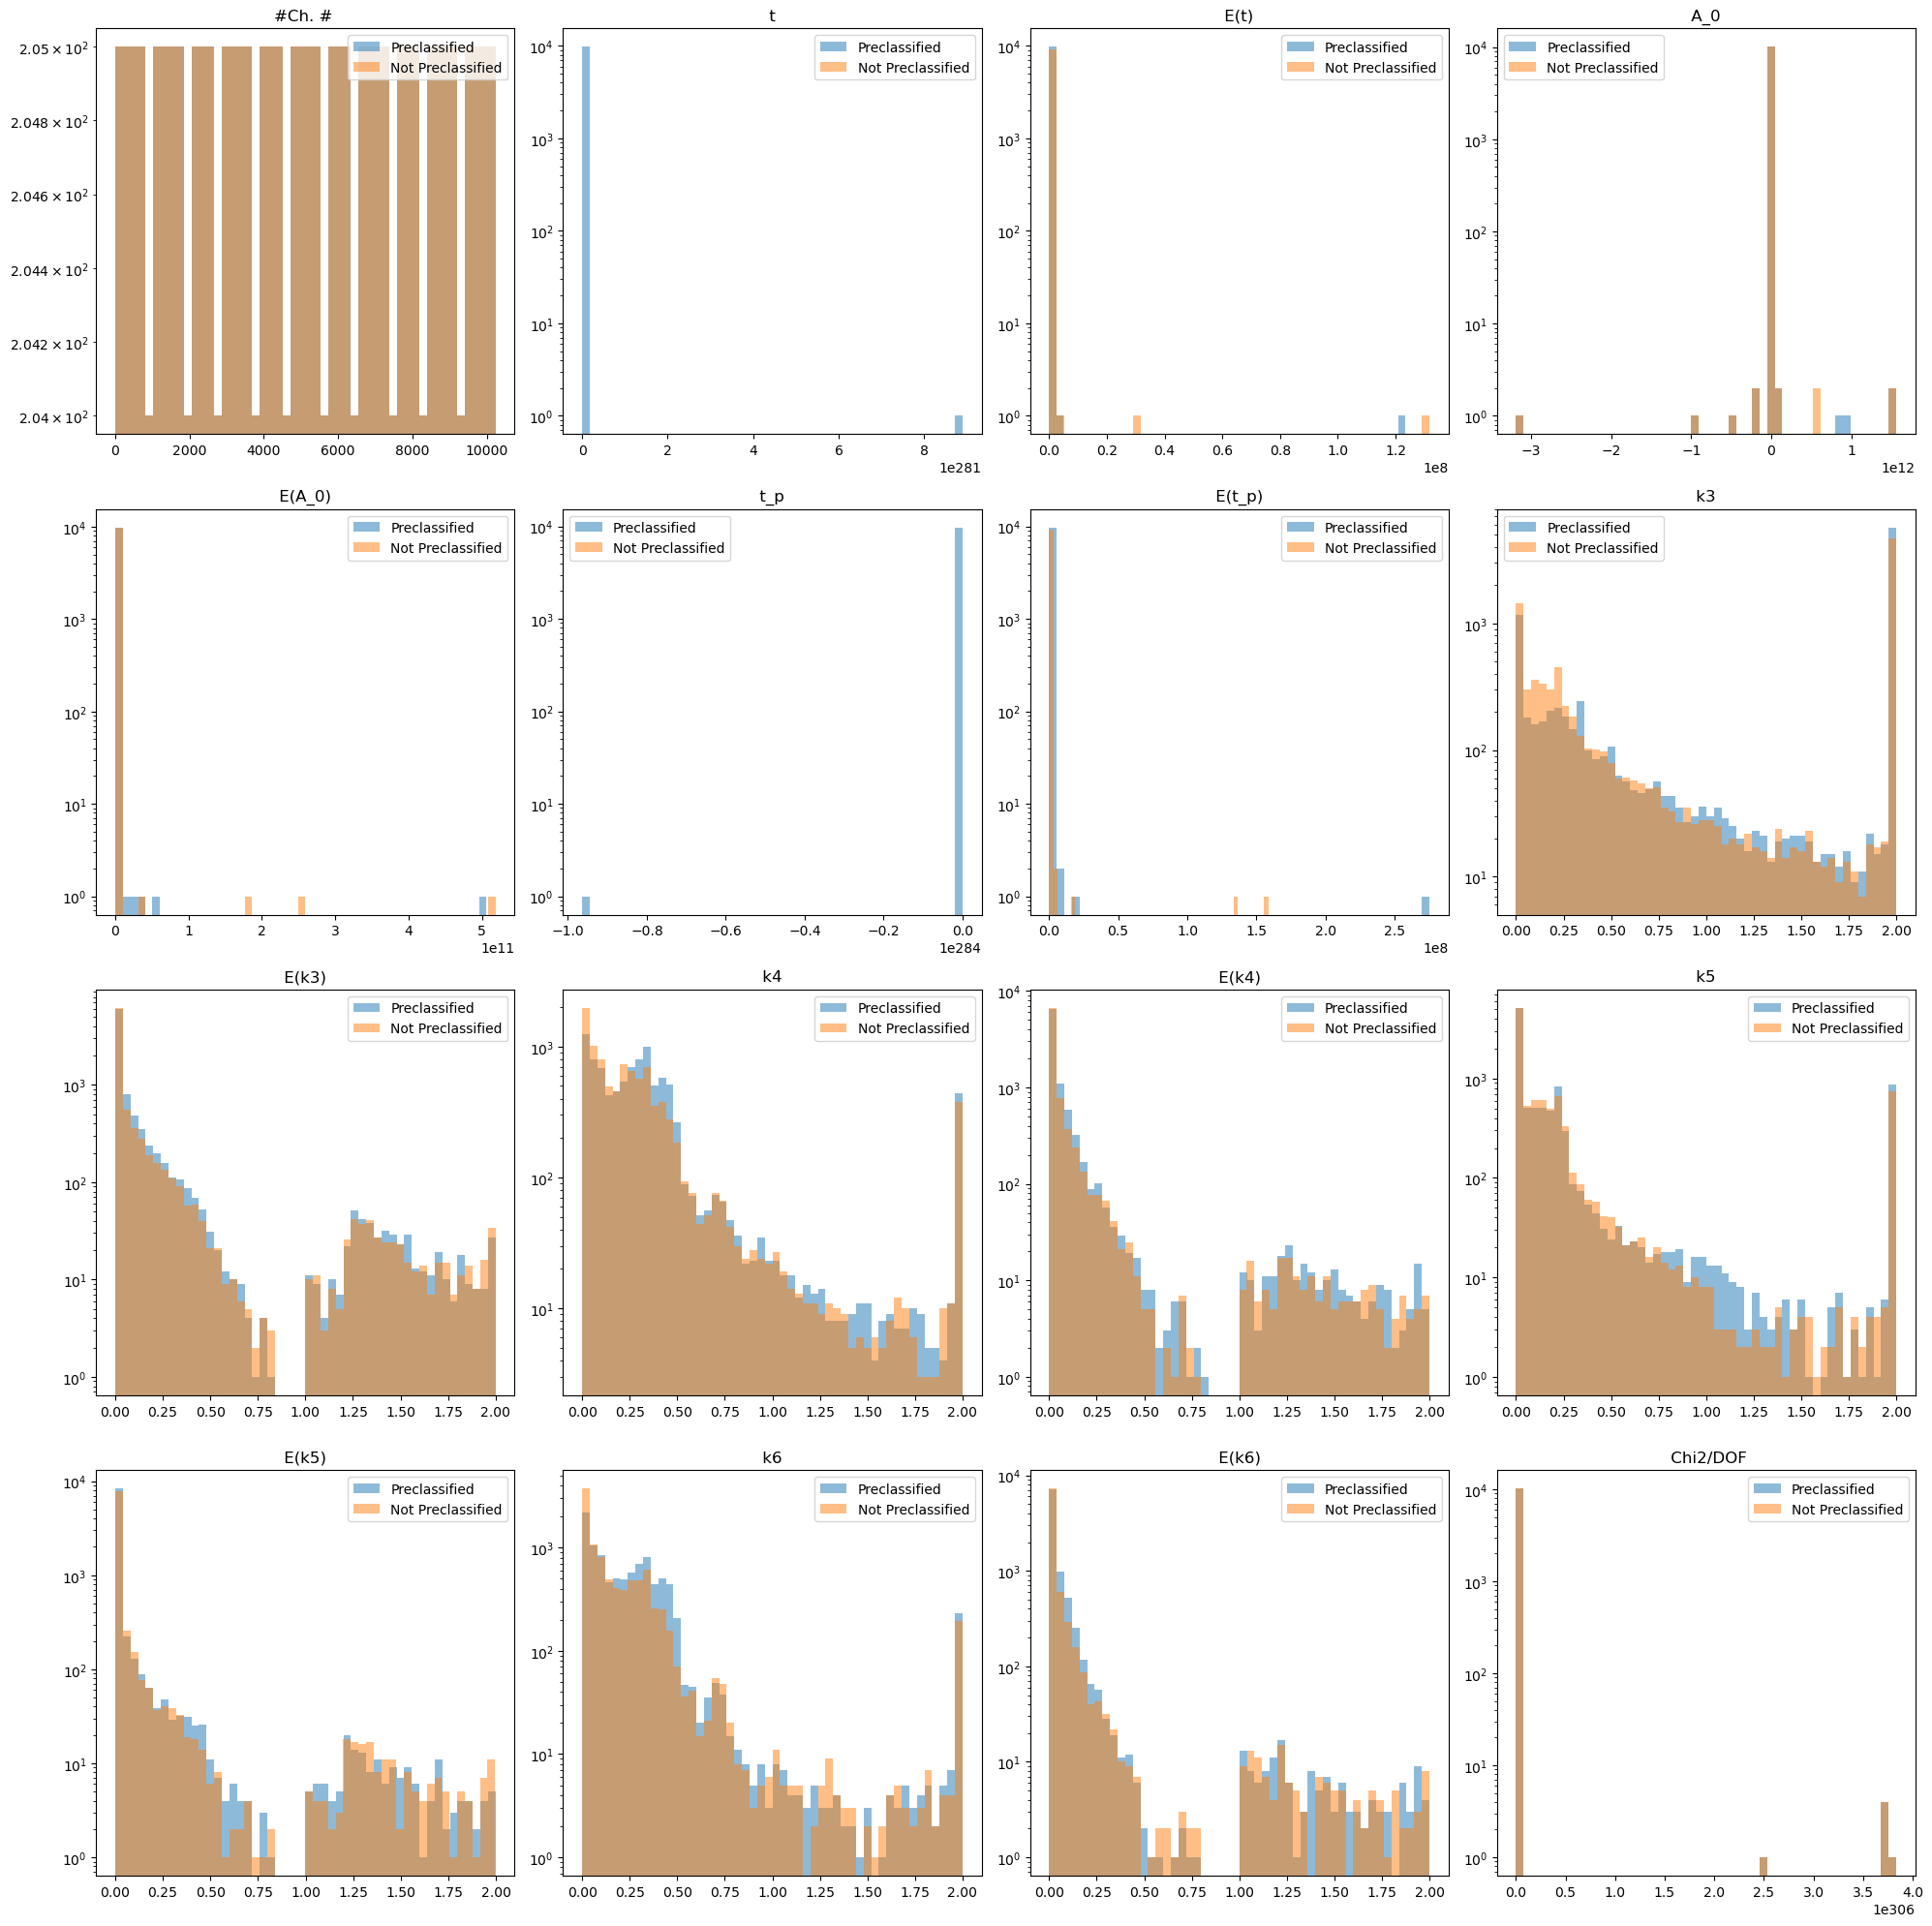

In [32]:
fig, ax = plt.subplots(4,4, figsize=(20, 20))
for i, col in enumerate(cols_of_interest):
    if col in ['run', 'file_name', 'preclassified']:
        continue
    # Remove non-finite values before plotting
    preclassified_data = preclassified_files[col].replace([np.inf, -np.inf], np.nan).dropna()
    not_preclassified_data = not_preclassified_files[col].replace([np.inf, -np.inf], np.nan).dropna()
    ax[i//4, i%4].hist(preclassified_data, bins=50, alpha=0.5, label='Preclassified')
    ax[i//4, i%4].hist(not_preclassified_data, bins=50, alpha=0.5, label='Not Preclassified')
    ax[i//4, i%4].set_title(col)
    ax[i//4, i%4].set_yscale('log')
    ax[i//4, i%4].legend()
plt.tight_layout()
plt.show()